In [1]:
#Some import Important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/SMSSpamCollection.txt",sep='\t',names=['label', 'message'])

#Exploratory Data Analysis (EDA)¶

    Exploring NaN values in dataset
    Plotting countplots for Spam vs. Ham

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.columns

Index(['label', 'message'], dtype='object')

In [6]:
df.dtypes

label      object
message    object
dtype: object

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.isnull().sum()

label      0
message    0
dtype: int64

Note: No null values in this data set

In [11]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

#zero means repersent the ham message
#one means repersent the spam message

In [12]:
#mapping values for label column
df['label'] = df['label'].map({'ham':0,'spam':1})

In [13]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


No handles with labels found to put in legend.


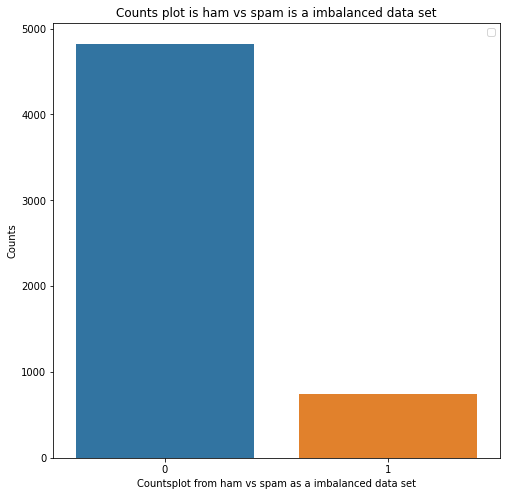

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='label',data=df)
p = plt.title("Counts plot is ham vs spam is a imbalanced data set")
p = plt.xlabel("Countsplot from ham vs spam as a imbalanced data set")
p = plt.ylabel("Counts")
plt.legend()

Note=:Above plot countsplot repersent the imbalanced data set

#Feature Engineering 
Handling imblanced data set using Oversampling.
```


Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc

In [15]:
#Handling imbalanced data set using oversamping
only_spam = df[df['label']==1]
print("number of spam records: {}".format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

number of spam records: 747
Number of Ham records: 4825


In [16]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

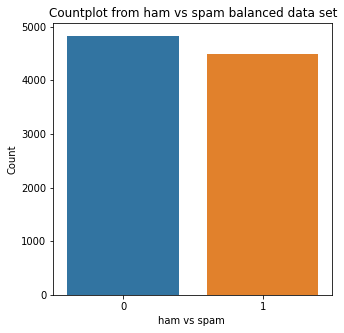

In [17]:
#count plot for spam vs Ham as balanced data set
plt.figure(figsize=(5,5))
p = sns.countplot(x='label',data=df)
p = plt.xlabel("ham vs spam ")
p = plt.ylabel("Count")
p = plt.title("Countplot from ham vs spam balanced data set")

In [18]:
#Creating new features word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [19]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


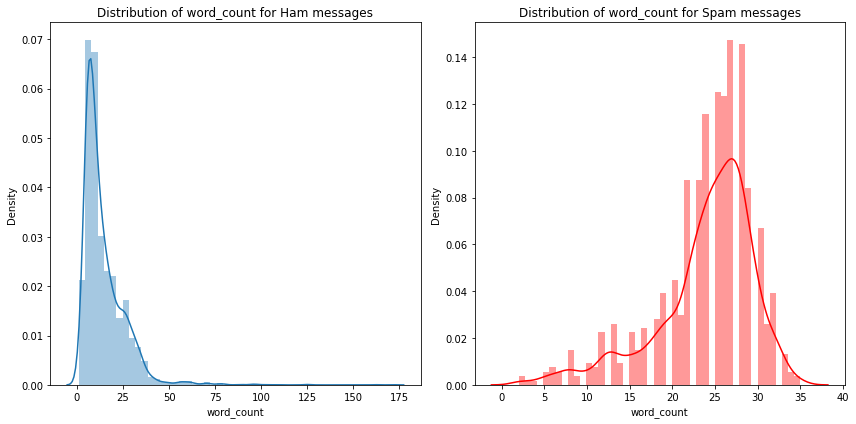

In [20]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

Note: Spam messages wordcount fall in the range of 15-30 words, whereas majority of the Ham messages fall in the range of below 25 words.

In [21]:
#Creating feature containus_currency_symbol
def currency(x):
  currency_symbols=['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0
df['contains_currency_symbol'] = df['message'].apply(currency)

In [22]:
df.head()

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0


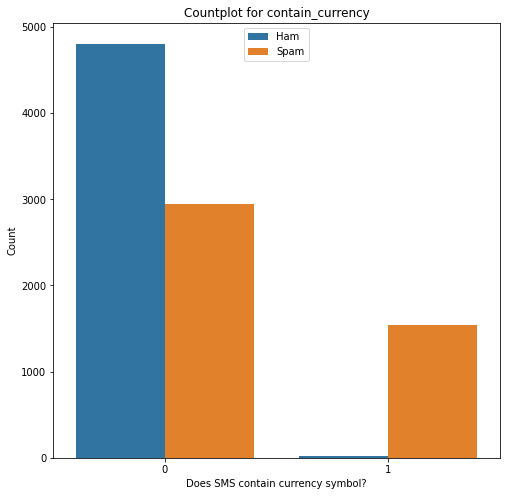

In [23]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Note: Almost 1/3 of Spam messages contain currency symbols, and currency symbols are rarely used in Ham messages.


In [24]:
#Creating feature contains_number 
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
    return 0

df['contains_number'] = df['message'].apply(numbers)

In [25]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,0
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


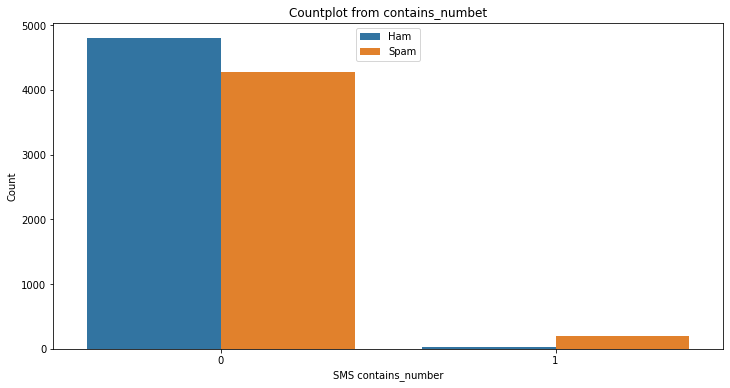

In [26]:
#Countplot for contains_number
plt.figure(figsize=(12,6))
g = sns.countplot(x='contains_number',data=df,hue='label')
p = plt.title("Countplot from contains_numbet")
p = plt.xlabel("SMS contains_number")
p = plt.ylabel("Count")
p = plt.legend(labels=['Ham','Spam'],loc=9)

Note: It is evident that most of the Spam messages contain numbers, and majority of the Ham messages donot contain numbers.



Data Cleaning

    Removing special character and numbers using regular expression
    Converting the entire sms into lower case
    Tokenizing the sms by words
    Removing the stop words
    Lemmatizing the words
    Joining the lemmatized words
    Building a corpus of messages



In [27]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)
  # Converting the entire sms into lower case
  message = message.lower()
  # Tokenizing the sms by words
  words = message.split()
  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)
  # Building a corpus of messages
  corpus.append(message)

In [29]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [30]:
#Creating the Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

In [31]:
#Extracting dependant and independant from the features 
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

In [32]:
# Fitting Random Forest to the Training set
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [33]:
training_x,test_x,training_y,test_y = train_test_split(X, y,test_size=0.3,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
cv = cross_val_score(rfc, X, y, scoring='f1',cv=10)
print("Average Score from RandomForestClassifier: {}".format(round(cv.mean(),3)))
print("Standard Deviation: {}".format(round(cv.std(), 3)))

Average Score from RandomForestClassifier: 0.995
Standard Deviation: 0.002


In [35]:
# Classification report for Random Forest model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(training_x, training_y)
y_pred = rfc.predict(test_x)

print('--- Classification report for Random Forest model ---')
print(classification_report(test_y, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1457
           1       0.99      0.99      0.99      1336

    accuracy                           0.99      2793
   macro avg       0.99      0.99      0.99      2793
weighted avg       0.99      0.99      0.99      2793



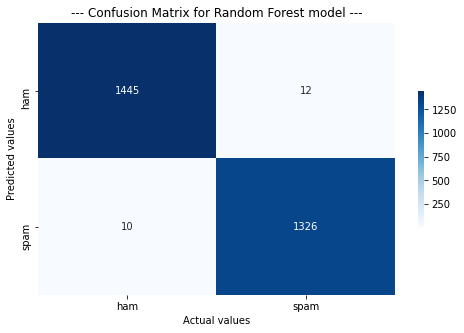

In [36]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

In [37]:
#Fitting naive_bayes to the training_set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X,y, scoring='f1',cv=10)
print("----Average F1-score from mnb model: {}---".format(round(cv.mean(),3)))
print("----Standard Deviation: {}----".format(round(cv.std(),3)))

----Average F1-score from mnb model: 0.943---
----Standard Deviation: 0.004----


In [38]:
#classification report of mnb model
mnb = MultinomialNB()
mnb.fit(training_x,training_y)
y_pred = mnb.predict(test_x)

print("-------Classification report of mnb model---------")
print(classification_report(test_y,y_pred))

-------Classification report of mnb model---------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1457
           1       0.94      0.94      0.94      1336

    accuracy                           0.94      2793
   macro avg       0.94      0.94      0.94      2793
weighted avg       0.94      0.94      0.94      2793



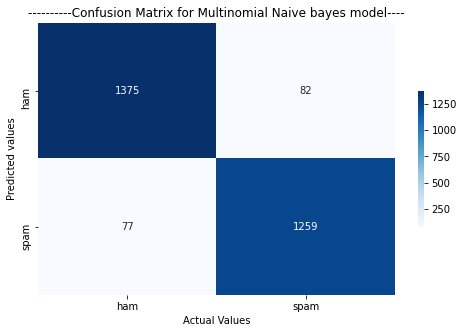

In [39]:
#Confusion Matrix for mnb model
cm = confusion_matrix(test_y,y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham','spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel("Actual Values")
p = plt.ylabel("Predicted values")
p = plt.title("----------Confusion Matrix for Multinomial Naive bayes model----")

In [40]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.98 ---
Standard Deviation: 0.003


In [41]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(training_x, training_y)
y_pred = dt.predict(test_x)

print('--- Classification report for Decision Tree model ---')
print(classification_report(test_y, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1457
           1       0.96      0.99      0.97      1336

    accuracy                           0.98      2793
   macro avg       0.98      0.98      0.98      2793
weighted avg       0.98      0.98      0.98      2793



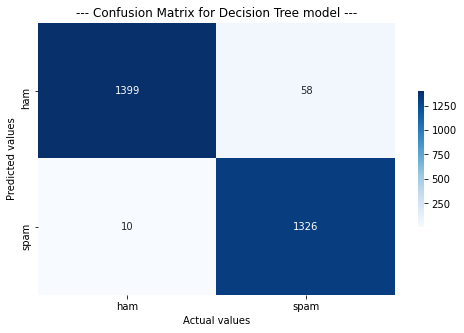

In [42]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(test_y, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

Note: Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!

In [43]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.979 ---
Standard Deviation: 0.004


Note: Voting algorithm did not out-perform Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.


#Making Predictions

In [44]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rfc.predict(temp)

In [45]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

Gotcha! This is a SPAM message.


In [46]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.


In [47]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')

This is a HAM (normal) message.
